In [329]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [330]:
df = pd.read_csv('data.csv')
df

,Global Land and Ocean Temperature Anomalies,February
0,Units: Degrees Celsius,NaN
1,Base Period: 1901-2000,NaN
2,Missing: -999,NaN
3,Year,Value
4,1880,-0.15
...,...,...
141,2017,1.03
142,2018,0.77
143,2019,0.86
144,2020,1.17


In [331]:
df.columns = ['Year','Value']
df = df[4:].astype(float)
df

,Year,Value
4,1880.0,-0.15
5,1881.0,-0.07
6,1882.0,0.01
7,1883.0,-0.36
8,1884.0,-0.19
...,...,...
141,2017.0,1.03
142,2018.0,0.77
143,2019.0,0.86
144,2020.0,1.17


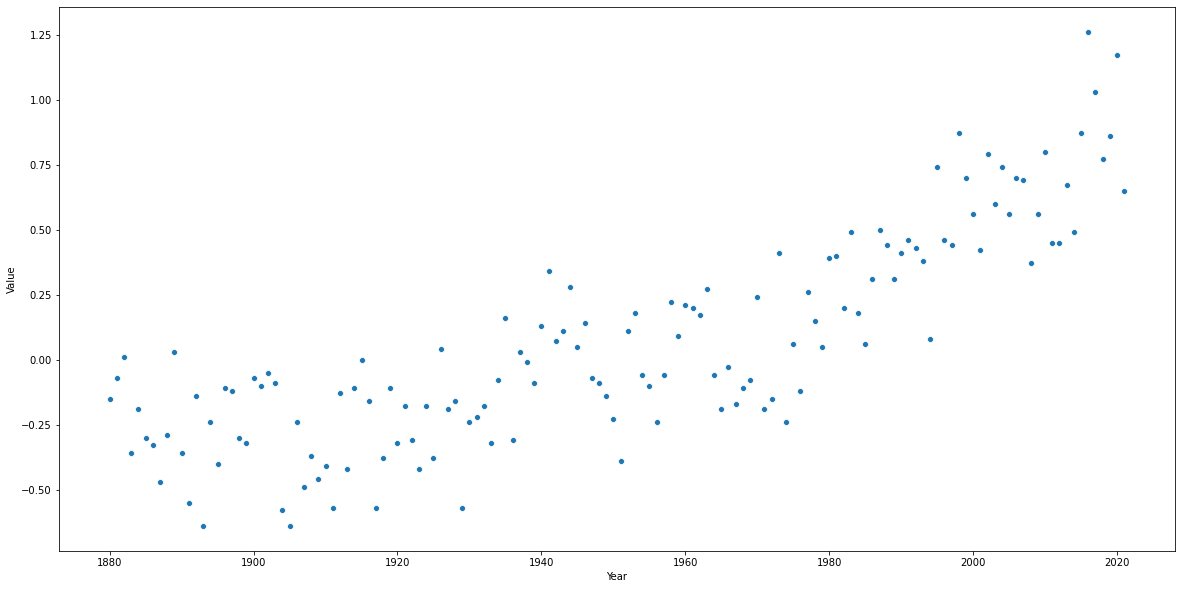

In [332]:
plt.figure(figsize=(20,10))
sns.scatterplot(df['Year'],df['Value'])

In [333]:
x = df['Year']
y = df['Value']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [339]:
lr = LinearRegression()
lr.fit(x_train.values.reshape(-1,1),y_train)
print(lr.intercept_)
print(lr.coef_)

-15.514764269755865
[0.00798916]


In [340]:
y_pred = lr.predict(x_test.values.reshape(-1,1))
compare = pd.DataFrame({'Year': x_test.values.flatten(),'Actual Value': y_test.values.flatten(), 'Predicted Value': y_pred.flatten()})
compare

,Year,Actual Value,Predicted Value
0,1925.0,-0.38,-0.135629
1,1948.0,-0.09,0.048121
2,1896.0,-0.11,-0.367315
3,1936.0,-0.31,-0.047749
4,1902.0,-0.05,-0.319380
5,1887.0,-0.47,-0.439218
6,1987.0,0.50,0.359699
7,2020.0,1.17,0.623341
8,1966.0,-0.03,0.191926
9,1980.0,0.39,0.303774


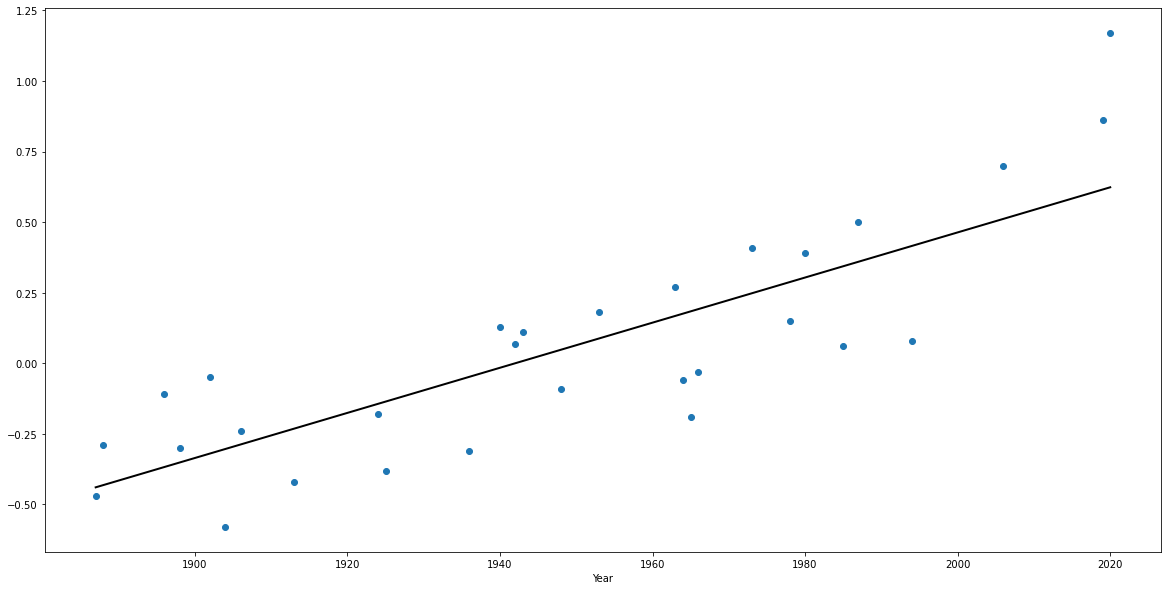

In [341]:
fig,(ax1) = plt.subplots(1, figsize = (20,10))
ax1.scatter (x_test.values.reshape(-1,1), y_test)
sns.lineplot(x_test,y_pred, color = 'black', linewidth = 2)

In [342]:
h_2030 = lr.intercept_+2030*lr.coef_
h_2030

array([0.7032325])